In [1]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd
from sklearn import preprocessing
import numpy as np


In [2]:
data_train = pd.read_csv(
        "./datasets/adult/adult.data",
        names=[
            "Age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
            "occupation", "relationship", "race", "gender", "capital gain", "capital loss",
            "hours per week", "native-country", "income"],
            # dtype=object,
            # sep=r'\s*,\s*',
            # engine='python',
            #na_values="?"
            )

data_test = pd.read_csv(
        "./datasets/adult/adult.test",
        names=[
            "Age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
            "occupation", "relationship", "race", "gender", "capital gain", "capital loss",
            "hours per week", "native-country", "income"],
            # dtype=object,
            # sep=r'\s*,\s*',
            # engine='python',
            #na_values="?"
            )

In [3]:
h = FeatureHasher(n_features=5,input_type='dict')


In [4]:


for i in range(data_train.shape[0]):
    if data_train.loc[i, 'income'] == ' <=50K':
        data_train.loc[i, 'income'] = -1
    else:
        data_train.loc[i, 'income'] = 1
        
for i in range(data_test.shape[0]):
    if data_test.loc[i, 'income'] == ' <=50K':
        data_test.loc[i, 'income'] = -1
    else:
        data_test.loc[i, 'income'] = 1

label_encoders = {}
for col_name in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    le = preprocessing.LabelEncoder()
    
    data_train.loc[:, col_name] = le.fit_transform(list(data_train.loc[:, col_name]))
    label_encoders[i] = le
    data_test.loc[:, col_name] = le.transform(data_test.loc[:, col_name])        

In [5]:
count1 = 0
count2 = 0
for i in range(data_train.shape[0]):
    if data_train.loc[i, 'income'] == -1:
        count1+= 1
    else:
        count2 += 1
        
        
print (count1, count2)

24720 7841


In [5]:
d = []
for i in range(data_train.shape[0]):
    row = data_train.iloc[i,:]
    row = row.drop(labels=['race'])
    row = row.drop(labels=['income'])

    t_dict = row.to_dict()
    d.append(t_dict)
    
hashed_train = h.transform(d)

In [6]:
d = []
for i in range(data_test.shape[0]):
    row = data_test.iloc[i,:]
    row = row.drop(labels=['race'])
    row = row.drop(labels=['income'])

    t_dict = row.to_dict()
    d.append(t_dict)
    
hashed_test = h.transform(d)
    

In [7]:
h_train = pd.DataFrame(hashed_train.toarray())
h_train = pd.concat((h_train, data_train['race']), axis = 1)
h_train = pd.concat((h_train, data_train['income']), axis = 1)

In [8]:
h_test = pd.DataFrame(hashed_test.toarray())
h_test = pd.concat((h_test, data_test['race']), axis = 1)
h_test = pd.concat((h_test, data_test['income']), axis = 1)

In [9]:
h_train.to_csv("hashed_adult_train.csv", index = False)

In [10]:
h_test.to_csv("hashed_adult_test.csv", index = False)

In [11]:
temp = pd.read_csv("hashed_adult_train.csv")

In [12]:
temp.shape

(32561, 7)

In [13]:
print (temp)

             0         1    2     3      4  race  income
0       2170.0   77529.0  0.0  36.0   79.0     4      -1
1         -2.0   83324.0  0.0  47.0   55.0     4      -1
2          0.0  215655.0  0.0  30.0   84.0     4      -1
3         -2.0  234728.0  0.0  56.0   84.0     2      -1
4         -2.0  338422.0  0.0  18.0   55.0     2      -1
5         -2.0  284596.0  0.0  24.0   83.0     4      -1
6         -3.0  160192.0  0.0  46.0   47.0     2      -1
7         -2.0  209651.0  0.0  47.0   87.0     4       1
8      14080.0   45795.0  0.0  22.0   99.0     4       1
9       5176.0  159462.0  0.0  37.0   82.0     4       1
10        -2.0  280474.0  0.0  26.0  122.0     2       1
11        -2.0  141310.0  0.0  28.0   68.0     1       1
12        -4.0  122285.0  0.0  15.0   70.0     4      -1
13        -4.0  205031.0  0.0  28.0  100.0     2      -1
14        -2.0  121783.0  0.0  36.0   42.0     1       1
15        -2.0  245491.0  0.0  33.0   84.0     0      -1
16        -4.0  176765.0  0.0  

In [1]:
import matplotlib.pyplot as plt
train_acc = [0.7843980343980343, 0.7985257985257985, 0.8126535626535627, 0.7886977886977887, 0.8230958230958231, 0.8040540540540541]
test_acc = [0.7620539278914071, 0.7606412382531785, 0.6916651311344512, 0.7706529082980161, 0.744241754192003, 0.6561022050242614]

train_deop = [0.10766946348537745, 0.05718140576024783, 0.03724047645790979, 0.05187539450323836, 0.046977561743440366, 0.014738505584994288]
test_deop = [0.01110253647286941, 0.07482694505096524, 0.17044852090615664, 0.019047686505625966, 0.026176893458170022, 0.04325094348065986]


In [2]:
x = list(range(5,11))
# create an index for each tick position
xi = [i for i in range(0, len(x))]



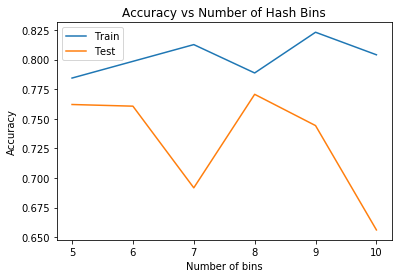

In [3]:
plt.title("Accuracy vs Number of Hash Bins")
plt.xlabel("Number of bins")
plt.ylabel ("Accuracy")
plt.plot(train_acc, label = "Train")
plt.plot(test_acc, label = "Test")
plt.legend()
plt.xticks(xi, x)
plt.savefig("AccuracyOverBins")
plt.show()

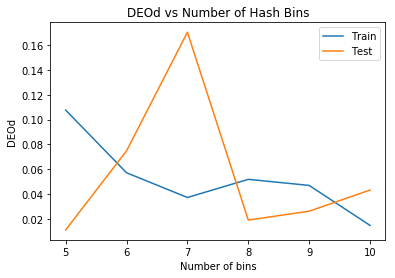

In [4]:
plt.title("DEOd vs Number of Hash Bins")
plt.xlabel("Number of bins")
plt.ylabel ("DEOd")
plt.plot(train_deop, label = "Train")
plt.plot(test_deop, label = "Test")
plt.legend()
plt.xticks(xi, x)
plt.savefig("DEOPOverBins")
plt.show()